In [1]:
import numpy as np
import random
import sys, os
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
from datetime import datetime
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array, graphs_and_dist, derivative
import warnings
warnings.filterwarnings("ignore")
#import test_operators_12_02_2021_sem_lambda as top
#import tes_operators_22_02_2021_KM as top
#import test_operators_11_02_2021 as top
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

In [2]:
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado')

pasta_a_pegar = '23_11_2022_09_46'

#Indivíduo final
data_final_ind = pd.read_table('{}/final_ind.csv'.format(pasta_a_pegar), sep =',')
final_ind = np.reshape(np.array(data_final_ind), (10,3))

#Anomalia final
colum_name = ["North(m)","East(m)","Altura de voo(m)","Anomalia Magnética(nT)"]
data_final_anomaly = pd.read_table('{}/result_anomaly.csv'.format(pasta_a_pegar), sep =',', names=colum_name, header=None)                               
anomaly_final = np.reshape(np.array(data_final_anomaly["Anomalia Magnética(nT)"]), (20,20))


#Inclinação final
data_final_incl = pd.read_table('{}/incl.csv'.format(pasta_a_pegar), sep =',')
tamanho = len(data_final_incl)
final_incl = np.reshape(np.array(data_final_incl), (tamanho))

#Declinação final
data_final_decl = pd.read_table('{}/decl.csv'.format(pasta_a_pegar), sep =',')
final_decl = np.reshape(np.array(data_final_decl), (tamanho))

#Gamma final
data_final_gamma = pd.read_table('{}/gamma.csv'.format(pasta_a_pegar), sep =',')
final_gamma = np.reshape(np.array(data_final_gamma), (tamanho))

#Phi final
data_final_phi = pd.read_table('{}/phi.csv'.format(pasta_a_pegar), sep =',')
final_phi = np.reshape(np.array(data_final_phi), (tamanho))

#Theta final
data_final_theta = pd.read_table('{}/theta.csv'.format(pasta_a_pegar), sep =',')
final_theta = np.reshape(np.array(data_final_theta), (tamanho))

#Mom final
data_final_mom = pd.read_table('{}/mom.csv'.format(pasta_a_pegar), sep =',')
final_mom = np.reshape(np.array(data_final_mom), (tamanho))



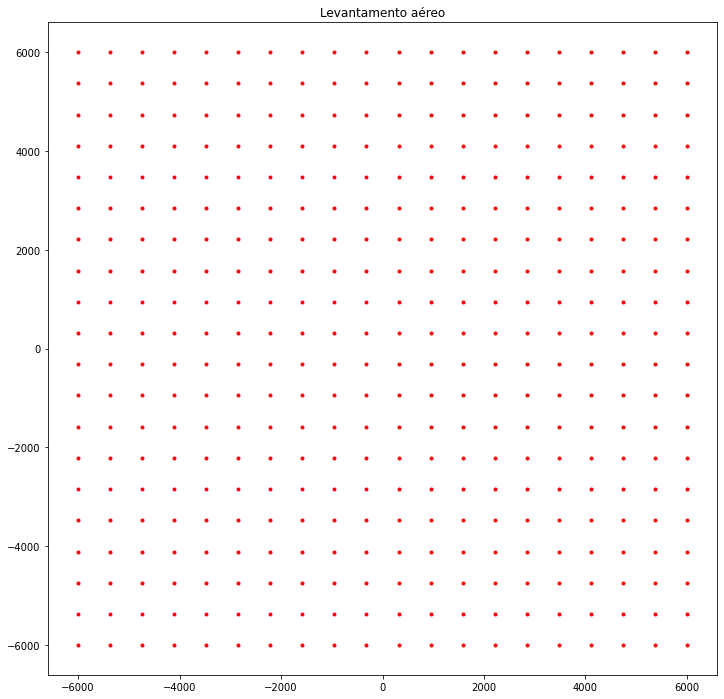

In [3]:
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Logfile/22_11_2022_07_41')
data_cubo = pd.read_table('data_mag.csv', sep=',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (20,20))

acquisition = {'nx': 20,
               'ny': 20,
               'ymax': data_cubo['East(m)'].max(),
               'ymin': data_cubo['East(m)'].min(),
               'xmax': data_cubo['North(m)'].max(),
               'xmin': data_cubo['North(m)'].min(),
               'z': -50.0,
               'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

# Plot 3D

In [4]:
def divide_param_dipolo(pop):
    coodX1 = []
    coodY1 = []
    coodZ1 = []
    incl1 = []
    decl1 = []
    mag1 = []

    for i in range(len(pop)-1):
        coodX1.append(pop[i,0])
        coodY1.append(pop[i,1])
        coodZ1.append(pop[i,2])
        incl1.append(pop[len(pop)-1,0])
        decl1.append(pop[len(pop)-1,1])
        mag1.append(pop[len(pop)-1,2])
    return coodX1, coodY1, coodZ1, incl1, decl1, mag1

coodX1, coodY1, coodZ1, incl1, decl1, mag1 = divide_param_dipolo(final_ind)

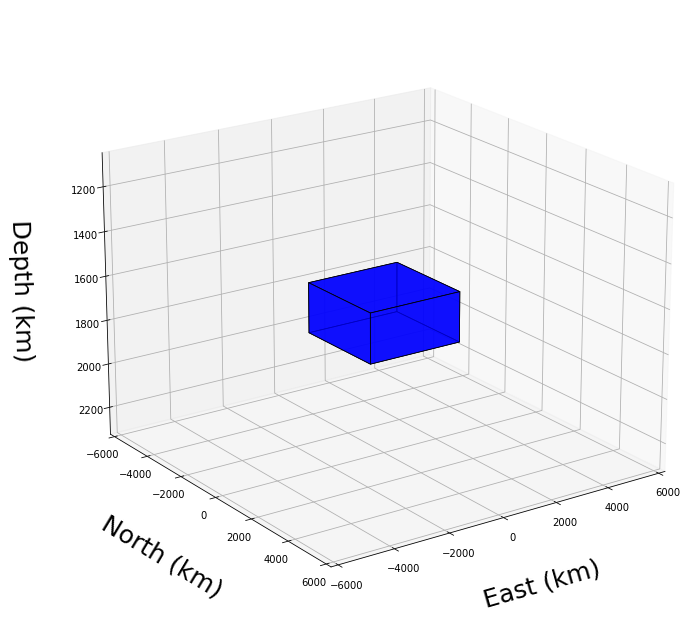

In [5]:
# coordenadas dos vertices (corners) do prisma, em metros:
x1,x2  = (-1675.0, 1675.0)
y1,y2 = (-1675.0, 1675.0)
z1,z2  = (1575.0, 1800.0)    # z eh positivo para baixo!
deltaz = 600.0
deltay = 1000.0
deltax = 1500.0
incl = 'positivo'

dic = {'n': 1,
       'x': [x1, x2],
       'y': [y1, y2],
       'z': [z1, z2],
       'deltay': deltay,
       'deltaz': deltaz,
       'deltax': deltax,
       'incl': incl,
       'merg': 'x'}

pointx, pointy, pointz = plot_3D.creat_point(**dic)


dic1 = {'x': [pointx[0], pointx[1]],
        'y': [pointy[0], pointy[1]],
        'z': [pointz[0], pointz[1]]}

'''dic2 = {'x': [pointx[2], pointx[3]],
        'y': [pointy[2], pointy[3]],
        'z': [pointz[2], pointz[3]]}

dic3 = {'x': [pointx[4], pointx[5]],
        'y': [pointy[4], pointy[5]],
        'z': [pointz[4], pointz[5]]}

dic4 = {'x': [pointx[6], pointx[7]],
        'y': [pointy[6], pointy[7]],
        'z': [pointz[6], pointz[7]]}'''

'''dic5 = {'x': [pointx[8], pointx[9]],
        'y': [pointy[8], pointy[9]],
        'z': [pointz[8], pointz[9]]}'''
#----------------------------------------------------------------------------------------------------#
vert1 =  plot_3D.vert_point(dic1)
'''vert2 =  plot_3D.vert_point(dic2)
vert3 =  plot_3D.vert_point(dic3)
vert4 =  plot_3D.vert_point(dic4)
#vert5 =  plot_3D.vert_point(dic5)'''
#----------------------------------------------------------------------------------------------------#
color = 'b'
size = [9, 10]
view = [200,305]
#----------------------------------------------------------------------------------------------------#
prism_1 = plot_3D.plot_prism(vert1, color)
'''prism_2 = plot_3D.plot_prism(vert2, color)
prism_3 = plot_3D.plot_prism(vert3, color)
prism_4 = plot_3D.plot_prism(vert4, color)
#prism_5 = plot_3D.plot_prism(vert5, color)'''
#----------------------------------------------------------------------------------------------------#
prisma1 = {'n': 1,
         'prisma': [prism_1]}#, prism_2,prism_3, prism_4]} #prism_5]}#, prism_2,prism_3]}

plot_3D.plot_obs_3d(prisma1, size, view, x, y, pointz)

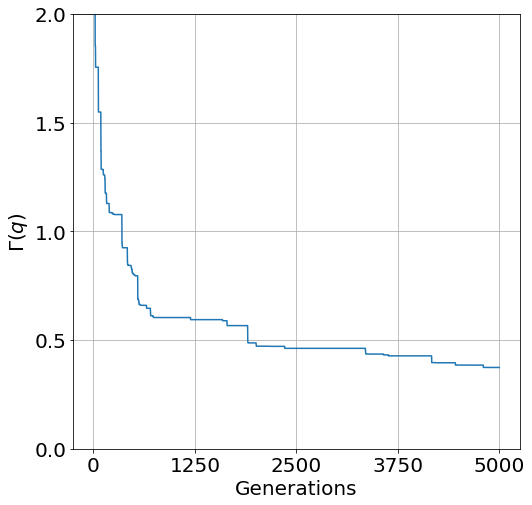

In [6]:
n_fit = len(final_gamma)
x_gama = np.linspace(0, n_fit, n_fit)
fig = plt.figure(figsize=(8, 8))
plt.plot(x_gama, final_gamma)
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$\Gamma(q)$', fontsize=20)
plt.xticks(np.linspace(0, tamanho+1, 5), fontsize = 20)
plt.yticks(np.linspace(0, 2.0, 5), fontsize = 20)
plt.ylim(0, 2.0)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/gamma.png".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/gamma.pdf".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
plt.show()

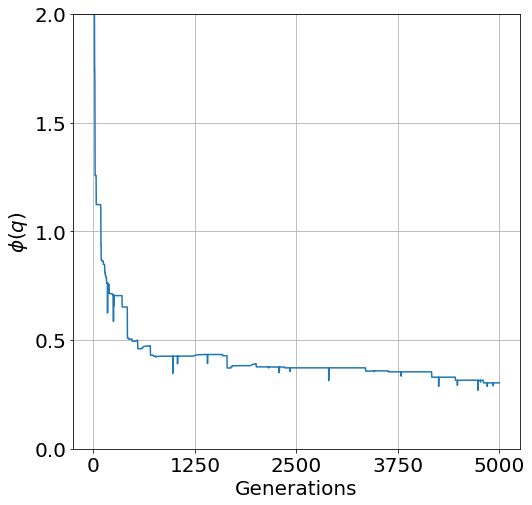

In [7]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x_gama, final_phi)
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$\phi(q)$', fontsize=20)
plt.xticks(np.linspace(0, tamanho+1, 5), fontsize = 20)
plt.yticks(np.linspace(0, 2.0, 5), fontsize = 20)
plt.ylim(0, 2.0)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/phi.png".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/phi.pdf".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
plt.show()

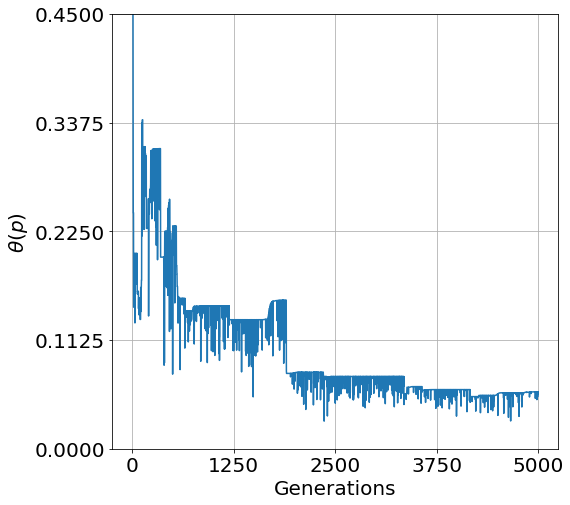

In [8]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x_gama, final_theta)
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$\\theta(p)$', fontsize=20)
plt.xticks(np.linspace(0, tamanho+1, 5), fontsize = 20)
plt.yticks(np.linspace(0, 0.45, 5), fontsize = 20)
plt.ylim(0, 0.45)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/theta.png".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/theta.pdf".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
plt.show()

In [9]:
spheres = final_ind[0:9,0:3]
incl = final_ind[9,0]
decl = final_ind[9,1]
mom = final_ind[9,2]
#print(spheres)
print(incl, decl, mom)
#anomaly= aux_operators_array.tfa_n_dips(incl, decl, mom, 15, X, Y, Z, I, D, spheres)

39.59310889699739 -22.46079276962994 4907056736.905623


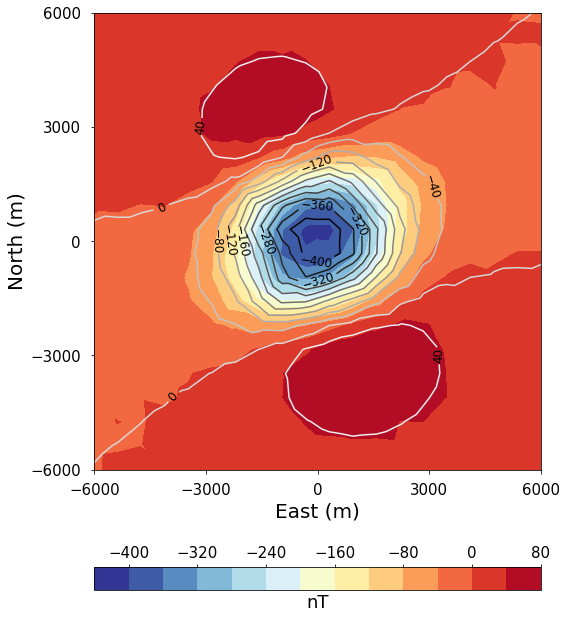

In [41]:
import matplotlib.tri as tri

triang = tri.Triangulation(Y.reshape(400), X.reshape(400))

fig, ax = plt.subplots(figsize=(8, 12))
#bolas = plt.contour(Y, X, final_anomaly, levels = 15, cmap = 'gray', linewidths = 2, vmin = np.min(final_anomaly), vmax = np.max(final_anomaly))
bolas = plt.tricontour(triang, anomaly_final.reshape(400), levels= 15, cmap = "gray", vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
manual_locations = [(0, 2000), (-2000, 0), (-2500, 0), (3000, -3000) , (-4000, 500), (-4000, -4000), (0,-500), (-3000, 3000), (-1500, 0), (-2750, 0),(0, 1000), (1000, 500), (3500, 1500), (0, -1000)]
plt.clabel(bolas, inline=True, fontsize=12, colors = 'k', manual=manual_locations)
#xs1 = [pointx[0], pointx[0], pointx[1], pointx[1], pointx[0]]
#ys1 = [pointy[0], pointy[1], pointy[1], pointy[0], pointy[0]]
#corpo = plt.plot(ys1,xs1,'k-')
cubo_anomaly = plt.tricontourf(triang, anomaly_cubo.reshape(400), levels= 15, cmap = plt.cm.RdYlBu_r, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.ylim(-4000,4000)
plt.xlim(-4000,4000)
#plt.xticks(np.linspace(Y.min(), Y.max(), 5), fontsize = 15)
#lt.yticks(np.linspace(X.min(), X.max(), 5), fontsize = 15)
plt.xticks(np.linspace(-6000,6000, 5), fontsize = 15)
plt.yticks(np.linspace(-6000,6000, 5), fontsize = 15)
cbar = plt.colorbar(orientation="horizontal")
cbar.ax.tick_params(labelsize=15, labeltop=True, labelbottom=False, top=True, bottom=False)
cbar.set_label("nT",fontsize=18, loc="center")
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2e}"))
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3e}"))
ax.tick_params(labelsize = 15, pad=10)
#cbar.ax.set_yticklabels([-240, -160, -80, 0, 80, 160], fontsize = 20)
#plt.text(6900, 6200,'nT', fontsize = 20)
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/final_anomaly.png".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/final_anomaly.pdf".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
plt.show()

In [11]:
def divide_param_dipolo(pop):
    coodX1 = []
    coodY1 = []
    coodZ1 = []
    incl1 = []
    decl1 = []
    mag1 = []

    for i in range(len(pop)-1):
        coodX1.append(pop[i][0])
        coodY1.append(pop[i][1])
        coodZ1.append(pop[i][2])
        incl1.append(pop[len(pop)-1][0])
        decl1.append(pop[len(pop)-1][1])
        mag1.append(pop[len(pop)-1][2])
    return coodX1, coodY1, coodZ1, incl1, decl1, mag1

coodX3, coodY3, coodZ3, incl3, decl3, mag3 = divide_param_dipolo(final_ind)
#print(coodX3)
#print(coodY3)
print(max(coodZ3))
print(f"{mag3[0]:.3e}")

1855.8713202025683
4.907e+09


In [12]:
import utm
#print(coodY3)
#print(coodX3)
#lat_, long_= utm.to_latlon(np.array(coodY3), np.array(coodX3), 23, 'K')
#cabecalho = ['lat']
#Data_lat_long = pd.DataFrame(data = lat_, index = None, columns=cabecalho)
#Data_lat_long['long'] = long_
#Data_lat_long['z'] = coodZ3
#Data_lat_long.to_csv('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/final_ind_lat_long_real_14_10_2022_17_20.csv', index = False, header = True)

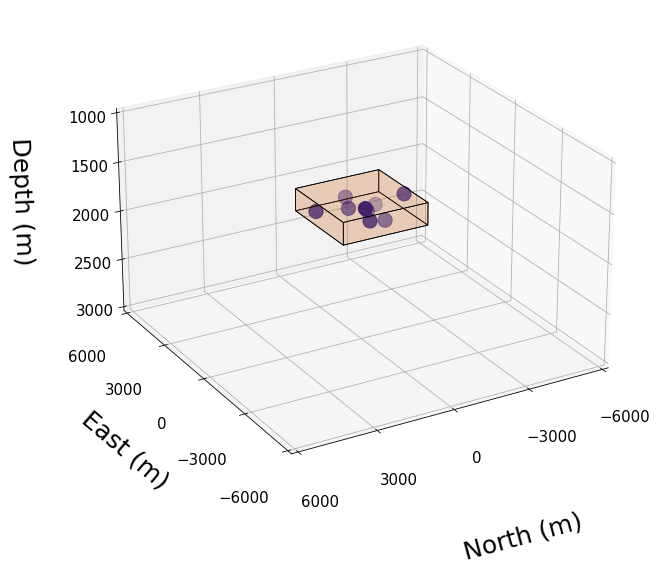

In [13]:
# Plot the main 3D source
figure = plt.figure(figsize=(8,10))

ax = figure.gca(projection = '3d')

fig01 = Poly3DCollection(vert1, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig01.set_facecolor('chocolate')
ax.add_collection3d(fig01)

'''fig02 = Poly3DCollection(vert2, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig02.set_facecolor('chocolate')
ax.add_collection3d(fig02)

fig03 = Poly3DCollection(vert3, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig03.set_facecolor('chocolate')
ax.add_collection3d(fig03)

fig04 = Poly3DCollection(vert4, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig04.set_facecolor('chocolate')
ax.add_collection3d(fig04)'''

'''fig05 = Poly3DCollection(vert5, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig05.set_facecolor('chocolate')
ax.add_collection3d(fig05)'''

individuo0 = ax.scatter(coodX3, coodY3, coodZ3, c=incl3, depthshade=True, cmap='plasma', s = 200.0)

# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
ax.get_proj = short_proj

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 80)
ax.set_ylabel('East (m)', size = 25, labelpad = 50)
ax.set_zlabel('Depth (m)', size = 25, labelpad = 40)
#ax.set_xlim(X.min(), X.max())
#ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(1000., 3000)
ax.set_xticks(np.linspace(X.min(), X.max(), 5))
ax.set_yticks(np.linspace(Y.min(), Y.max(), 5))
ax.set_zticks(np.linspace(1000, 3000, 5))
#ax.invert_zaxis()
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3e}"))
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2e}"))
ax.tick_params(axis="x",labelsize = 15, pad=25, width=8.0, labelleft=True)
ax.tick_params(axis="y",labelsize = 15, pad=30)
ax.tick_params(axis="z",labelsize = 15, pad=10)
#cbar1 = plt.colorbar(individuo0, orientation = 'horizontal', pad=-0.008)
#cbar1.ax.tick_params(labelsize=15, labeltop=True, labelbottom=False, top=True, bottom=False)
#cbar1.set_label("m",fontsize=18, loc="center")
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)

# Visualization angle
ax.view_init(335,300)

plt.tight_layout(True)
#plt.savefig('figs/dikemodel-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#plt.savefig('figs/dikemodel-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/final_3d.png".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/final_3d.pdf".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
plt.show()

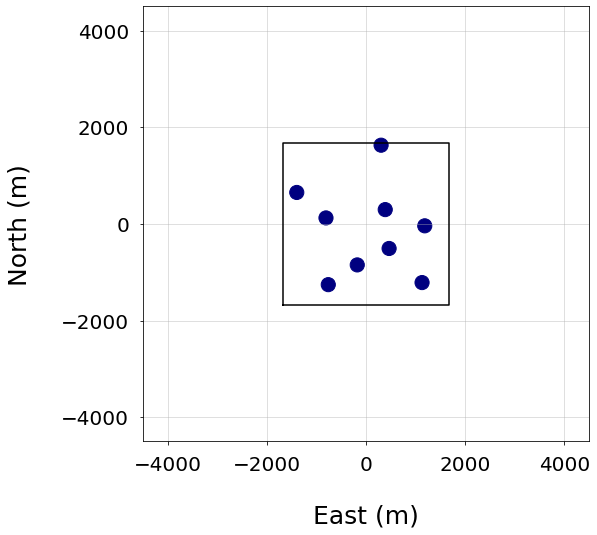

In [14]:
figure = plt.figure(figsize=(8,8))
ax = figure.gca()

individuo_3 = ax.scatter(coodY3, coodX3, c=incl3, cmap='jet', s = 200.0)

xs1 = [pointx[0], pointx[0], pointx[1], pointx[1], pointx[0]]
ys1 = [pointy[0], pointy[1], pointy[1], pointy[0], pointy[0]]
corpo = plt.plot(ys1,xs1,'k-')

'''xs2 = [pointx[2], pointx[2], pointx[3], pointx[3], pointx[2]]
ys2 = [pointy[2], pointy[3], pointy[3], pointy[2], pointy[2]]
corpo2 = plt.plot(ys2,xs2,'k-')

xs3 = [pointx[4], pointx[4], pointx[5], pointx[5], pointx[4]]
ys3 = [pointy[4], pointy[5], pointy[5], pointy[4], pointy[4]]
corpo3 = plt.plot(ys3,xs3,'k-')

xs4 = [pointx[6], pointx[6], pointx[7], pointx[7], pointx[6]]
ys4 = [pointy[6], pointy[7], pointy[7], pointy[6], pointy[6]]
corpo4 = plt.plot(ys4,xs4,'k-')'''

'''xs5 = [pointx[8], pointx[8], pointx[9], pointx[9], pointx[8]]
ys5 = [pointy[8], pointy[9], pointy[9], pointy[8], pointy[8]]
corpo5 = plt.plot(xs5,ys5,'k-')'''

# Labels
ax.set_xlabel('East (m)', size = 25, labelpad = 30)
ax.set_ylabel('North (m)', size = 25, labelpad = 30)
ax.set_xlim(-4500, 4500)
ax.set_ylim(-4500, 4500)
ax.set_xticks(np.linspace(-4000, 4000, 5))
ax.set_yticks(np.linspace(-4000, 4000, 5))
ax.tick_params(labelsize = 20, pad = 10)
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2e}"))
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3e}"))
plt.grid(alpha=0.5)
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/final_2d_y_x.png".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/final_2d_y_x.pdf".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
plt.show()

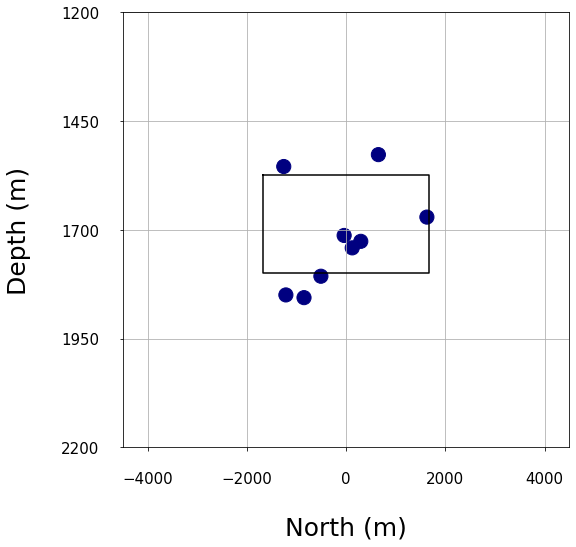

In [15]:
figure = plt.figure(figsize=(8,8))
ax = figure.gca()

individuo_0 = ax.scatter(coodX3, coodZ3, c=incl3, cmap='jet', s = 200.0)

xs1 = [pointx[0], pointx[0], pointx[1], pointx[1], pointx[0]]
zs1 = [pointz[0], pointz[1], pointz[1], pointz[0], pointz[0]]
corpo = plt.plot(xs1, zs1,'k-')

'''xs2 = [pointx[2], pointx[2], pointx[3], pointx[3], pointx[2]]
zs2 = [pointz[2], pointz[3], pointz[3], pointz[2], pointz[2]]
corpo2 = plt.plot(xs2,zs2,'k-')

xs3 = [pointx[4], pointx[4], pointx[5], pointx[5], pointx[4]]
zs3 = [pointz[4], pointz[5], pointz[5], pointz[4], pointz[4]]
corpo3 = plt.plot(xs3,zs3,'k-')

xs4 = [pointx[6], pointx[6], pointx[7], pointx[7], pointx[6]]
zs4 = [pointz[6], pointz[7], pointz[7], pointz[6], pointz[6]]
corpo4 = plt.plot(xs4,zs4,'k-')'''

'''xs5 = [pointx[8], pointx[8], pointx[9], pointx[9], pointx[8]]
ys5 = [pointy[8], pointy[9], pointy[9], pointy[8], pointy[8]]
corpo5 = plt.plot(xs5,ys5,'k-')'''

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('Depth (m)', size = 25, labelpad = 30)
ax.invert_yaxis()
ax.set_xlim(-4500, 4500, 5)
ax.set_xticks(np.linspace(-4000, 4000, 5))
ax.set_yticks(np.linspace(1200, 2200, 5))
ax.tick_params(labelsize = 15, pad = 20)
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3e}"))
plt.grid()
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3e}"))
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3e}"))
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/final_2d_z_x.png".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/final_2d_z_x.pdf".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
plt.show()

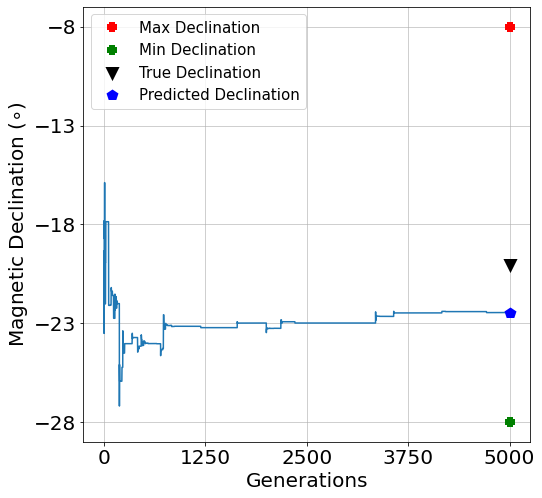

In [16]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x_gama, final_decl)
decl_max = plt.plot(tamanho+1,(-08.0),'r+', mew = 10.0, label = 'Max Declination')
decl_mim = plt.plot(tamanho+1,(-28.0),'g+', mew = 10.0, label = 'Min Declination')
decl_real = plt.plot(tamanho+1,(-20.0),'kv', mew = 5.0, label = 'True Declination')
decl_real = plt.plot(tamanho+1,final_decl[tamanho-1],'bp', mew = 5.0, label = 'Predicted Declination')
#decl_true = plt.plot(np.max(x_decl),(0.0),'b+', mew = 10.0, label = 'True Declination')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('Magnetic Declination $(\circ)$', fontsize=20)
plt.xticks(np.linspace(0, tamanho+1, 5), fontsize = 20)
plt.yticks(np.linspace(-28.0, -8.0, 5), fontsize = 20)
plt.grid(alpha=0.75)
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/decl.pdf".format(pasta_a_pegar), dpi=300, bbox_inches='tight', transparent= True)
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/decl.png".format(pasta_a_pegar), dpi=300, bbox_inches='tight', transparent= True)
plt.show()

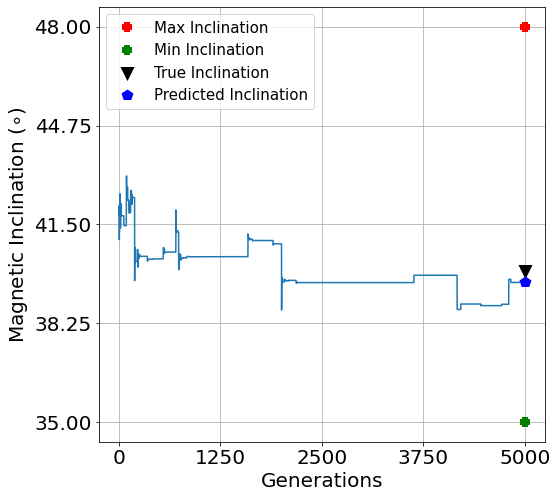

In [17]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x_gama, final_incl)
decl_max = plt.plot(tamanho+1,(48.0),'r+', mew = 10.0, label = 'Max Inclination')
decl_mim = plt.plot(tamanho+1,(35.0),'g+', mew = 10.0, label = 'Min Inclination')
decl_real = plt.plot(tamanho+1,(40.0),'kv', mew = 5.0, label = 'True Inclination')
decl_real = plt.plot(tamanho+1,final_incl[tamanho-1],'bp', mew = 5.0, label = 'Predicted Inclination')
#decl_true = plt.plot(np.max(x_decl),(0.0),'b+', mew = 10.0, label = 'True Declination')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('Magnetic Inclination $(\circ)$', fontsize=20)
plt.yticks(np.linspace(35.0, 48.0, 5), fontsize = 20)
plt.xticks(np.linspace(0, tamanho+1, 5), fontsize = 20)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/incl.pdf".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/incl.png".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
plt.show()

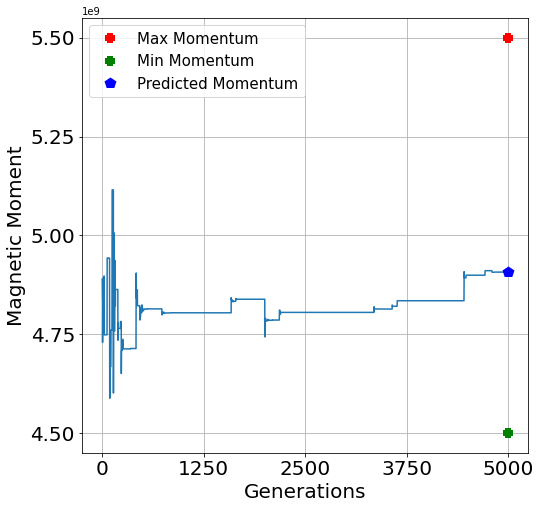

In [18]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x_gama, final_mom)
mom_max = plt.plot(tamanho+1,(5.5e10/10),'r+', mew = 10.0, label = 'Max Momentum')
mom_mim = plt.plot(tamanho+1,(4.5e10/10),'g+', mew = 10.0, label = 'Min Momentum')
#decl_real = plt.plot(5000,(90.0),'k*', mew = 10.0, label = 'True Inclination')
mom_real = plt.plot(tamanho+1,final_mom[tamanho-1],'bp', mew = 5.0, label = 'Predicted Momentum')
#decl_true = plt.plot(np.max(x_decl),(0.0),'b+', mew = 10.0, label = 'True Declination')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('Magnetic Moment', fontsize=20)
plt.yticks(np.linspace(4.5e10/10, 5.5e10/10, 5), fontsize = 20)
plt.xticks(np.linspace(0, tamanho+1, 5), fontsize = 20)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/mom.pdf".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/mom.png".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
plt.show()

In [19]:
residuo_anomaly = anomaly_cubo - anomaly_final
res = np.reshape(residuo_anomaly, (400))
#print(res)
res_mu1 = np.mean(res)
res_sigma1 = np.std(res)
print(res_mu1, res_sigma1)
max_res = np.max(res)

from scipy.stats import norm

-1.288656724458428 10.744415886655672


55


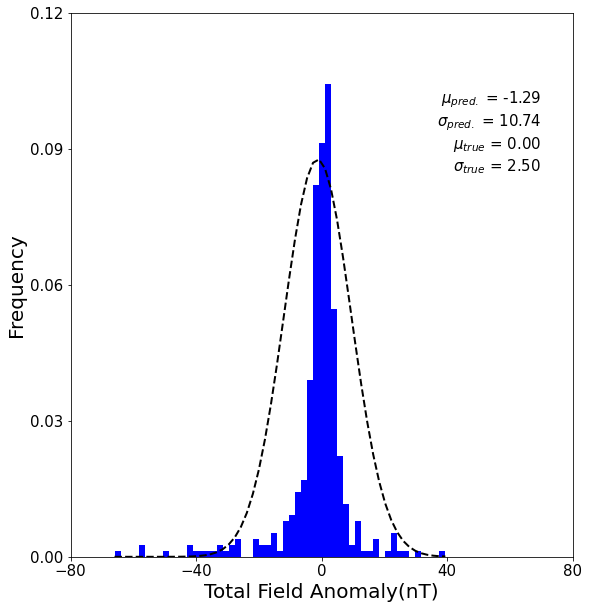

In [20]:
plt.figure(figsize=(9,10))
#s = (res - res_mu) / res_sigma
#s = np.ravel(s)
nbins = 55 #int(np.max(res) - np.min(res))
print(nbins)
n, bins, patches = plt.hist(res, nbins, facecolor = 'blue', alpha = 1., density=True)
y_hist = norm.pdf(bins, res_mu1, res_sigma1)
plt.plot(bins, (max_res*0.06)*y_hist, 'k--', linewidth = 2)
plt.xlabel('Total Field Anomaly(nT)', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(np.linspace(-80, 80, 5), fontsize = 20)
plt.yticks(np.linspace(0.0, 0.12, 5), fontsize = 15)
plt.xticks(fontsize = 15)
label_mu = plt.text(70,0.10, '$\mu_{pred.}$ = %0.2f' % (res_mu1), horizontalalignment = 'right', fontsize = 15)
label_sigma = plt.text(70,0.095, '$\sigma_{pred.}$ = %0.2f' % (res_sigma1), horizontalalignment = 'right', fontsize = 15)
label_mu_true = plt.text(70,0.090, '$\mu_{true}$ = %0.2f' % (0.00), horizontalalignment = 'right', fontsize = 15)
label_sigma_true = plt.text(70,0.085, '$\sigma_{true}$ = %0.2f' % (2.5), horizontalalignment = 'right', fontsize = 15)
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/hist.png".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/hist.pdf".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
plt.show()


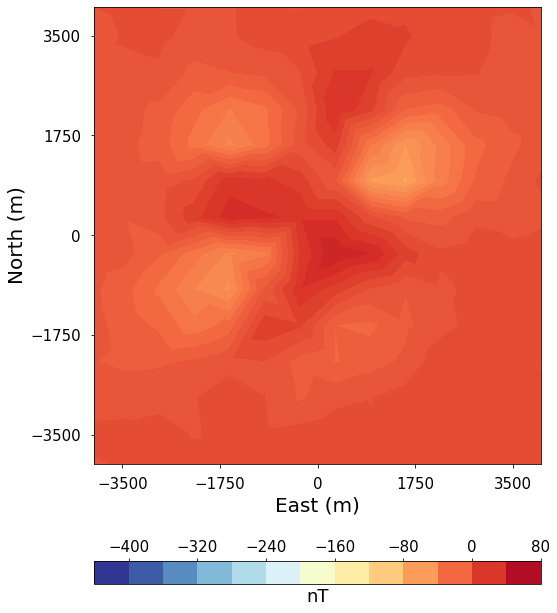

In [21]:
fig, ax = plt.subplots(figsize=(8, 12))
#bolas = plt.contour(Y, X, final_anomaly, levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#plt.clabel(bolas , inline=2, fontsize=15, colors = 'k')
cubo = plt.tricontourf(triang, residuo_anomaly.reshape(400), 15, cmap = plt.cm.RdYlBu_r, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
#plt.xticks(np.linspace(-3500,3500, 5), fontsize = 20)
#plt.yticks(np.linspace(-3500,3500, 5), fontsize = 20)
plt.ylim(-4000,4000)
plt.xlim(-4000,4000)
cbar = plt.colorbar(cubo_anomaly,orientation="horizontal")
cbar.ax.tick_params(labelsize=15, labeltop=True, labelbottom=False, top=True, bottom=False)
cbar.set_label("nT",fontsize=18, loc="center")
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2e}"))
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3e}"))
ax.tick_params(labelsize = 15, pad=10)
plt.xticks(np.linspace(-3500, 3500, 5), fontsize = 15)
plt.yticks(np.linspace(-3500, 3500, 5), fontsize = 15)
#cbar.ax.set_yticklabels([-90, -60, -30, 0, 30, 60], fontsize = 20)
#plt.text(6900, 6200,'nT', fontsize = 20)
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/residuo.png".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/{}/residuo.pdf".format(pasta_a_pegar), dpi=300, bbox_inches='tight')
plt.show()